In [2]:
import pandas as pd
from HelperFunctions.model_performance import *
from HelperFunctions.feature_visualizations import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [3]:
plt.rc('font', family='serif') # change font types for plots
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [4]:
sns.set(palette='colorblind')

# Load Data

In [5]:
df = pd.read_csv('./data/df_aggregated_spc.csv')

In [6]:
topologies = df["topology"].unique()
print("Total: ",len(df))
for top in topologies:
    print("top: ",top)
    df_sub = df[df["topology"]==top]
    print("\t",len(df_sub))
    print("")

Total:  85251
top:  4h
	 14692

top:  ferredoxin
	 14385

top:  beta_grasp
	 2374

top:  thio
	 2046

top:  fold2
	 657

top:  coil
	 573

top:  fold4
	 255

top:  HHH
	 12016

top:  EEHEE
	 9715

top:  EHEE
	 6645

top:  HEEH
	 16899

top:  NTF2
	 4994



In [7]:
#leaderboard = pd.read_html("./data/test_harness_results/custom_classification_leaderboard.html")[0]
leaderboard = pd.read_html("./data/cross_val_test_harness_results/custom_classification_leaderboard.html")[0]
leaderboard = leaderboard.replace('__init__','keras cnn')
metric_list = ['Accuracy','Balanced Accuracy','AUC Score',
            'Average Precision','F1 Score','Precision','Recall']
models_list = leaderboard['Model Name'].unique()


#initialize empty list for storing dataframe rows
data = []


#iterate through each metric
for metric in metric_list:
    #initialize empty list that will contain each row
    row = []
    
    
    row.append(f"∆{metric}")


    #iterate through each model
    for model in models_list:
        #get dataframe subset that only contains the given model
        model_df = leaderboard[leaderboard["Model Name"]==model]

        #separate between RS and R values
        RS_model_df = model_df[model_df["Data and Split Description"]=="RS"]
        R_model_df = model_df[model_df["Data and Split Description"]=="R"]

        #get difference in metric between each
        avg_diff = np.average(RS_model_df[metric].values - R_model_df[metric].values)
        
        
        std_diff = np.std(RS_model_df[metric].values - R_model_df[metric].values)
        row.append((avg_diff,std_diff))
        
    data.append(row)
    #data_raw.append(row_raw)


cols = models_list.tolist()
cols.insert(0,"∆Metric")

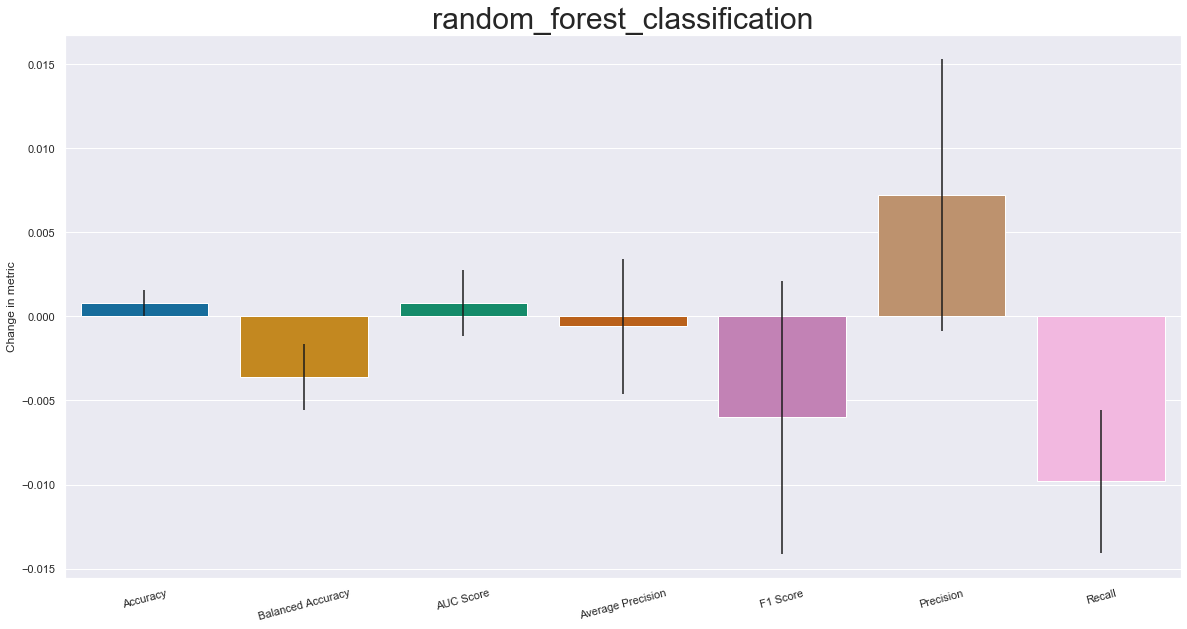

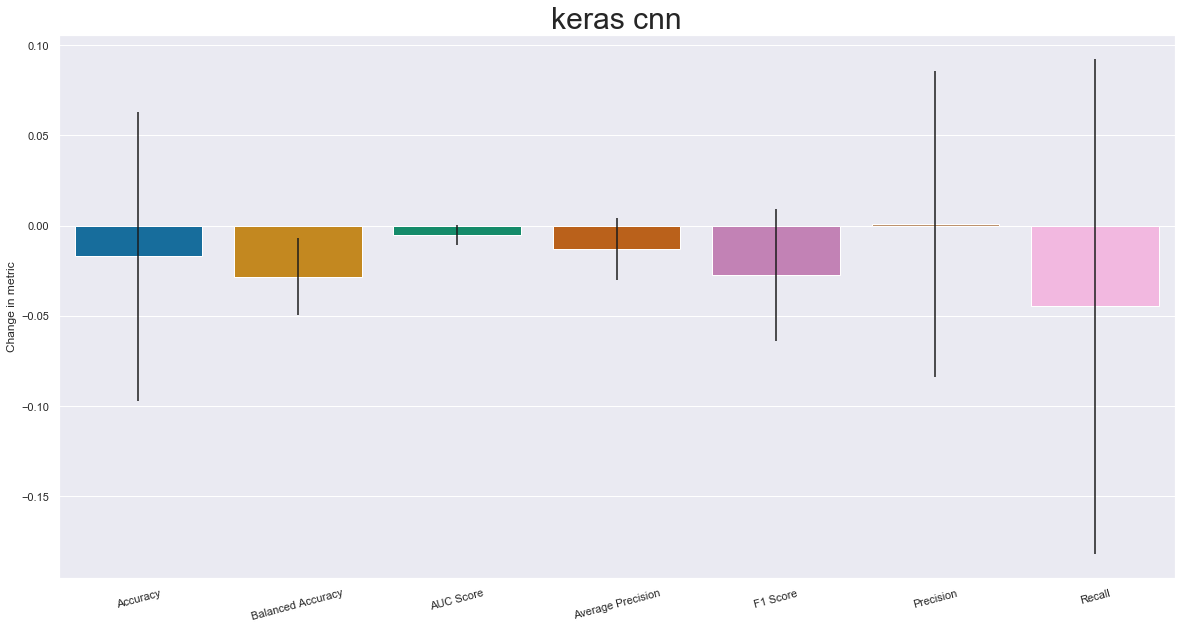

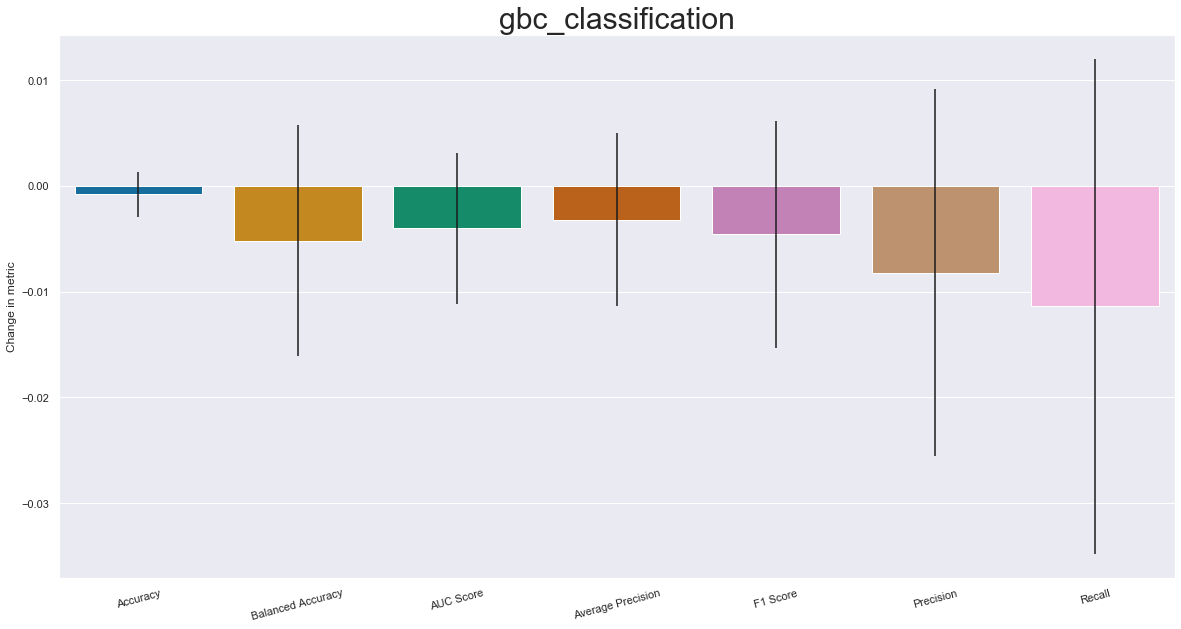

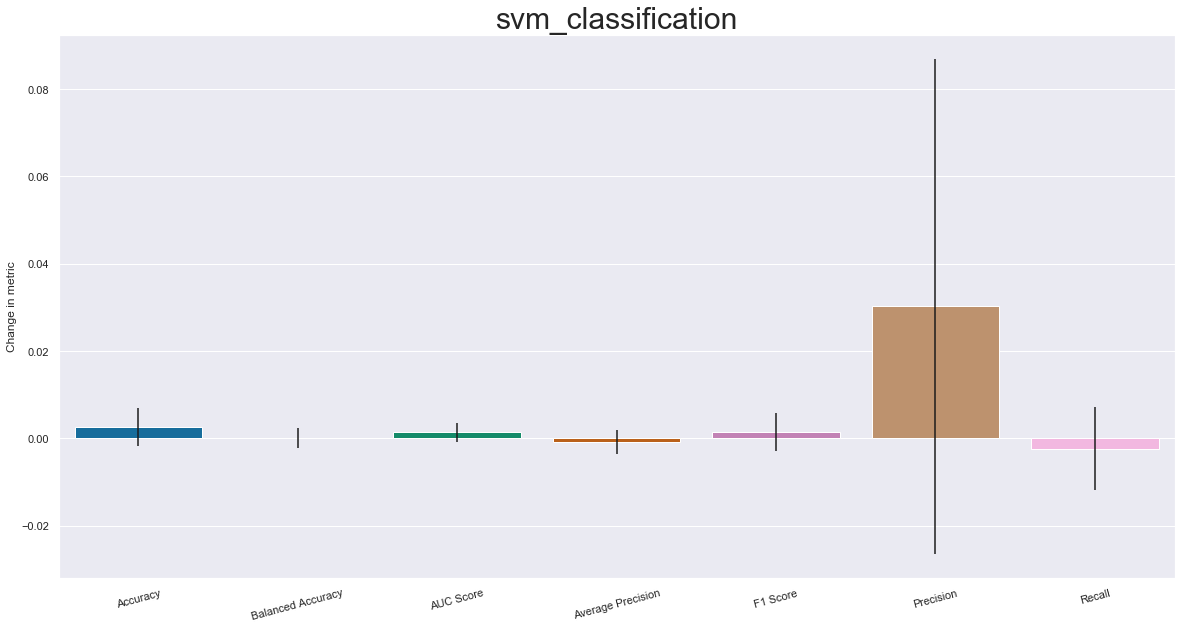

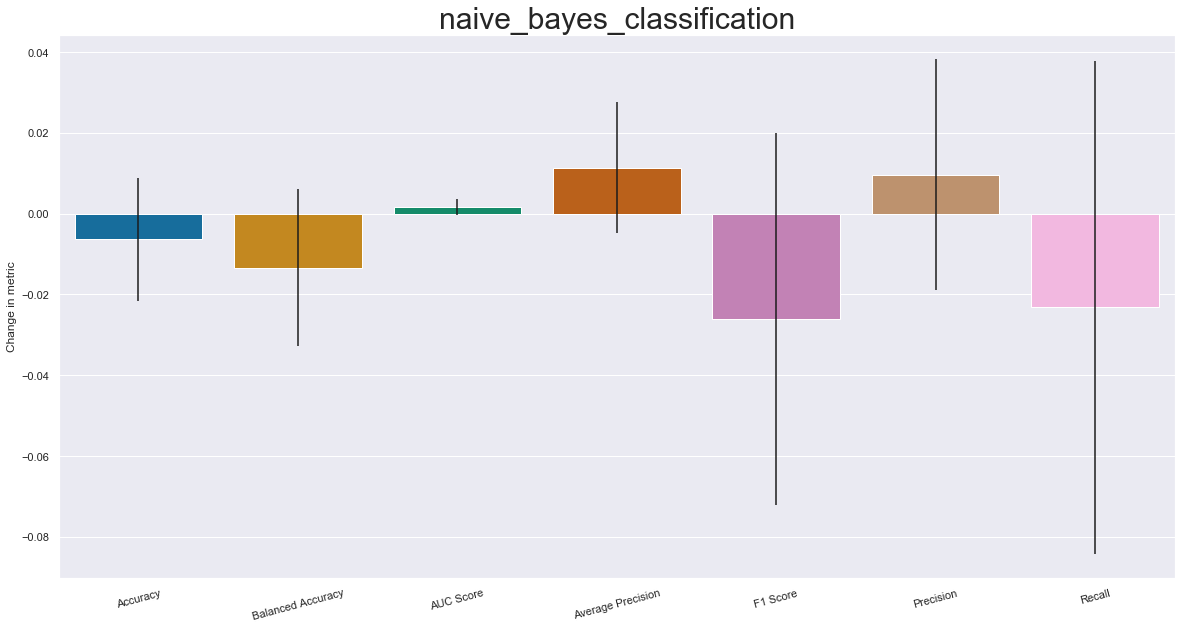

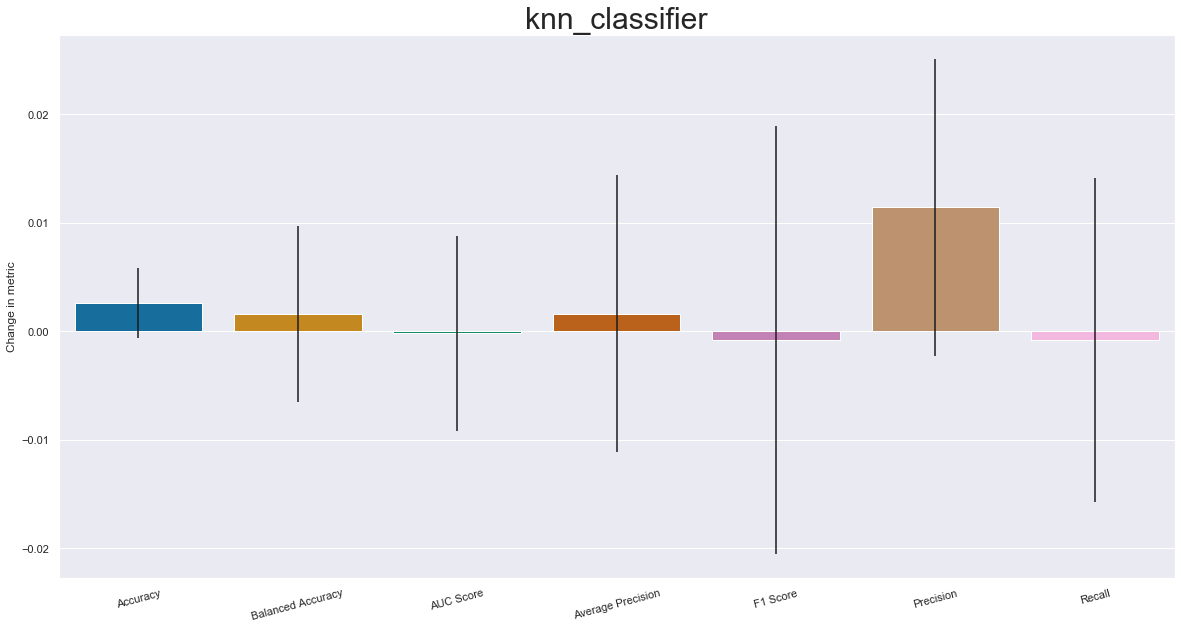

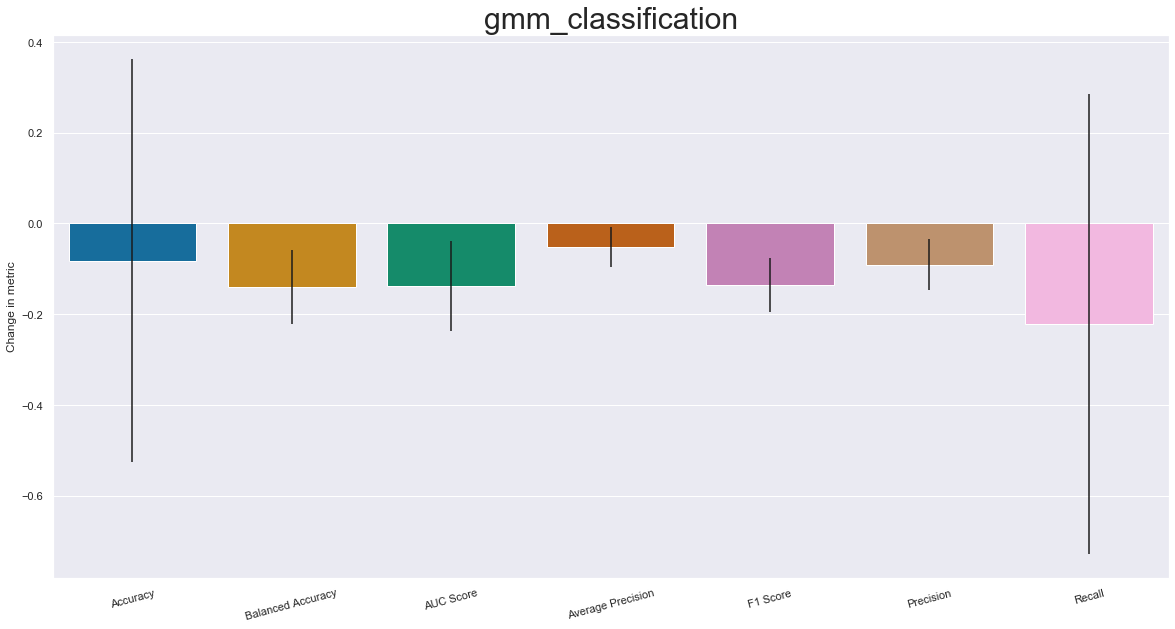

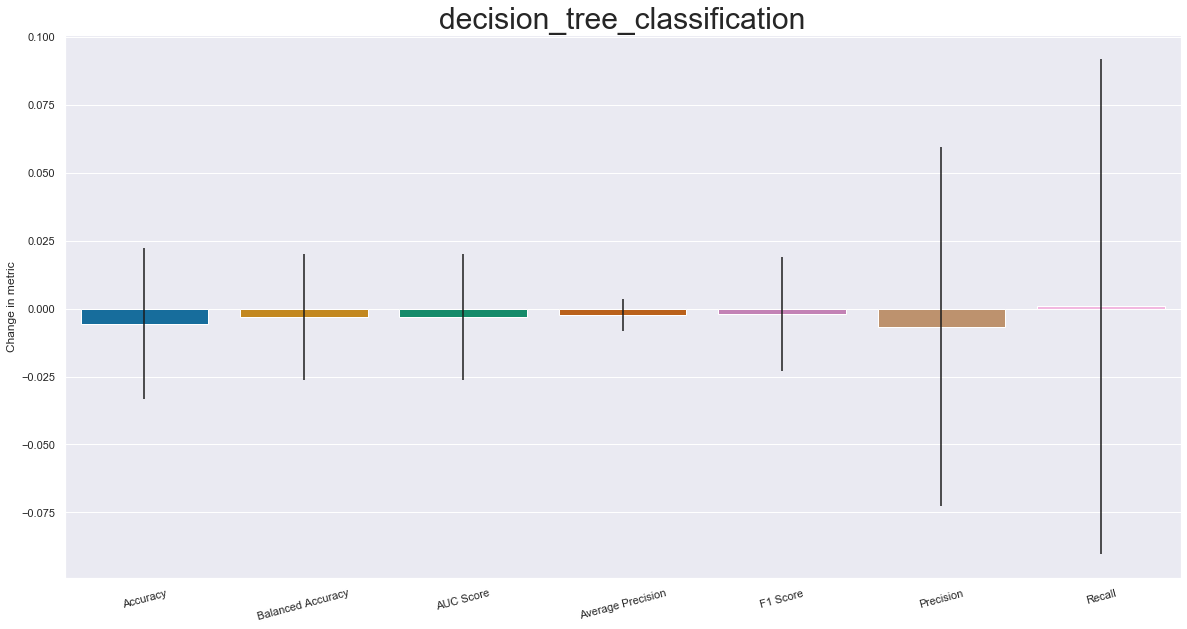

In [8]:
boop  = pd.DataFrame(data,columns=cols)

#iterate through columns except first
for col in range(len(boop.iloc[0,:])-1):
    
    averages = []
    sigmas = []
    for row in range(len(boop.iloc[:,0])):
        averages.append(boop.iloc[row,col+1][0])
        sigmas.append(boop.iloc[row,col+1][1])
#         print(averages)
#         print(sigmas)
    plt.figure(figsize=(20,10))
    plt.title(f"{models_list[col]}",fontsize="30")
    sns.barplot(x=metric_list,y=averages,yerr=sigmas)
    plt.xticks(fontsize='11',rotation=15)
    plt.ylabel("Change in metric")
    plt.show()

In [9]:
boop  = pd.DataFrame(data,columns=cols)
x_l = []
a_l = []
s_l= []
n_l = []
#iterate through columns except first
for col in range(len(boop.columns)-1):
    print(col)
    averages = []
    sigmas = []
    for row in range(len(boop.iloc[:,0])):
        averages.append(boop.iloc[row,col+1][0])
        sigmas.append(boop.iloc[row,col+1][1])
    
    x_l.append(metric_list)
    a_l.append(averages)
    s_l.append(sigmas)
    n_l.append([boop.columns[col+1]]*len(sigmas))
  

0
1
2
3
4
5
6
7


In [10]:
#leaderboard = pd.read_html("./data/test_harness_results/custom_classification_leaderboard.html")[0]
leaderboard = pd.read_html("./data/cross_val_test_harness_results/custom_classification_leaderboard.html")[0]
leaderboard = leaderboard.replace('__init__','keras cnn')
metric_list = ['Accuracy','Balanced Accuracy','AUC Score',
            'Average Precision','F1 Score','Precision','Recall']
models_list = leaderboard['Model Name'].unique()


#initialize empty list for storing dataframe rows
data_raw = []

#iterate through each metric
for metric in metric_list:
    #initialize empty list that will contain each row
    row_raw = []
    
    

    #iterate through each model
    for model in models_list:
        #get dataframe subset that only contains the given model
        model_df = leaderboard[leaderboard["Model Name"]==model]

        #separate between RS and R values
        RS_model_df = model_df[model_df["Data and Split Description"]=="RS"]
        R_model_df = model_df[model_df["Data and Split Description"]=="R"]

        #get difference in metric between each
        raw_diff = RS_model_df[metric].values - R_model_df[metric].values
        
        #print(f"{len(raw_diff)}-instances for {metric} in {model} model")

        #row_raw.append([[f"∆{metric}"]]*len(raw_diff))
        a = [[f"{metric}"]]*len(raw_diff)
        b = raw_diff.reshape(-1,1)
        c = [[f"{model}"]]*len(raw_diff)
        d = np.concatenate([a,b,c],axis=1)
        
        
        
        for di in d:
            data_raw.append(di)
        


cols = ["Metric","Score","Model Name"]

df_raw = pd.DataFrame(data_raw, columns=cols)
df_raw["Score"] = df_raw["Score"].map(float)

In [11]:
new_vector = []

#flatten the list of averages
flat_list_metric = [item for sublist in x_l for item in sublist]
flat_list_avg = [item for sublist in a_l for item in sublist]
flat_list_std = [item for sublist in s_l for item in sublist]
flat_list_names = [item for sublist in n_l for item in sublist]
    

for group in zip(
                    flat_list_metric,
                    flat_list_names, 
                    flat_list_avg, 
                    flat_list_std
                ):
    new_vector.append(list(group))
df = pd.DataFrame(new_vector,columns=["Metric","Model","Average","Err"])
translator = {
    "svm_classification":"SVM",
    "random_forest_classification":"RFC",
    'keras cnn':"CNN",
    "gbc_classification":"GBC",
    "knn_classifier":"K-NN",
    "naive_bayes_classification":"NBC",
    "decision_tree_classification":"DTC",
    "gmm_classification":"GMM"
    
}
df["Model"] = [translator[i] for i in df["Model"].values]
df_raw["Model Name"] = [translator[i] for i in df_raw["Model Name"].values]

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


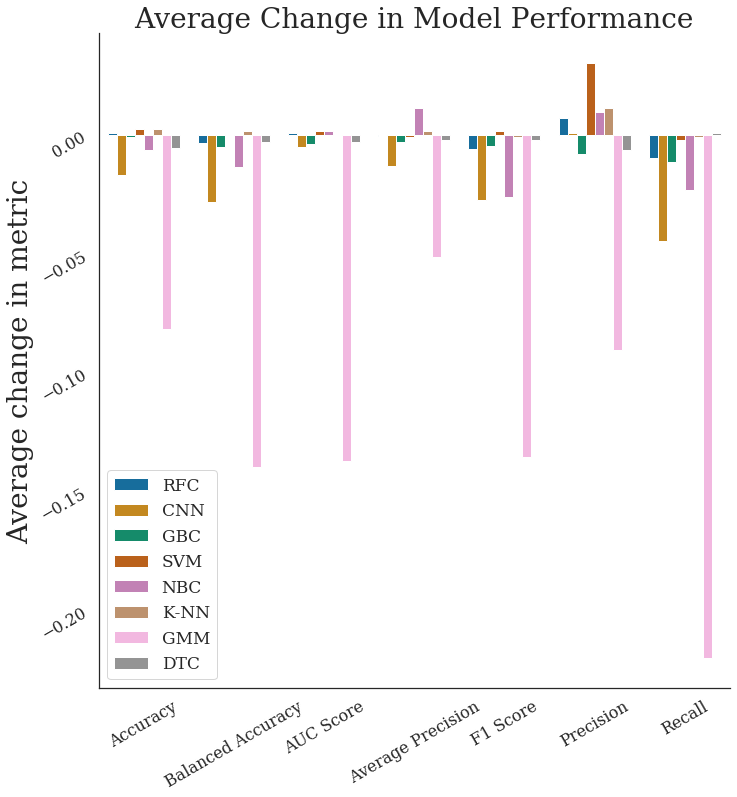

In [12]:
sns.set_style("white")
plt.rc('font', family='serif') # change font types for plots
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
g = sns.catplot(x="Metric",y="Average",hue="Model",data=df,kind='bar',palette="colorblind",
                size=10,legend_out=False,ci=95)
g.axes[0,0].set_title("Average Change in Model Performance",fontsize="28")
g.axes[0,0].tick_params(axis='both', which='major', labelsize=16,rotation=30)
g.axes[0,0].set_xlabel("")
g.axes[0,0].set_ylabel("Average change in metric",fontsize='28')
g.axes[0,0].legend(fontsize='17')



#plt.savefig("Figure4",dpi=600,bbox_inches="tight")
plt.show()


/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


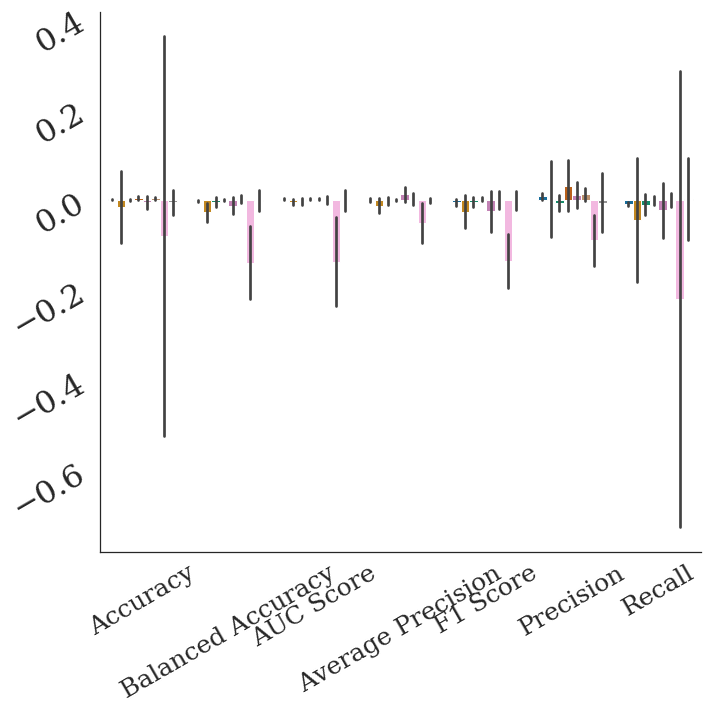

In [13]:
sns.set_style("white")
plt.rc('font', family='serif') # change font types for plots
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
g = sns.catplot(x="Metric",y="Score",hue="Model Name",data=df_raw,kind='bar',palette="colorblind",
                size=10,legend_out=False,ci="sd")
g.axes[0,0].set_title("Average Change in Model Performance",fontsize="28")
g.axes[0,0].tick_params(axis='both', which='major', labelsize=16,rotation=30)
g.axes[0,0].set_xlabel("")
g.axes[0,0].set_ylabel("")
g.axes[0,0].legend().remove()
plt.title("")

plt.yticks(fontsize='32')
plt.xticks(fontsize='25')
plt.tight_layout()
plt.savefig("./SavedFigures/Figure4_v2_inset",dpi=600,bbox_inches="tight")
plt.show()


/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


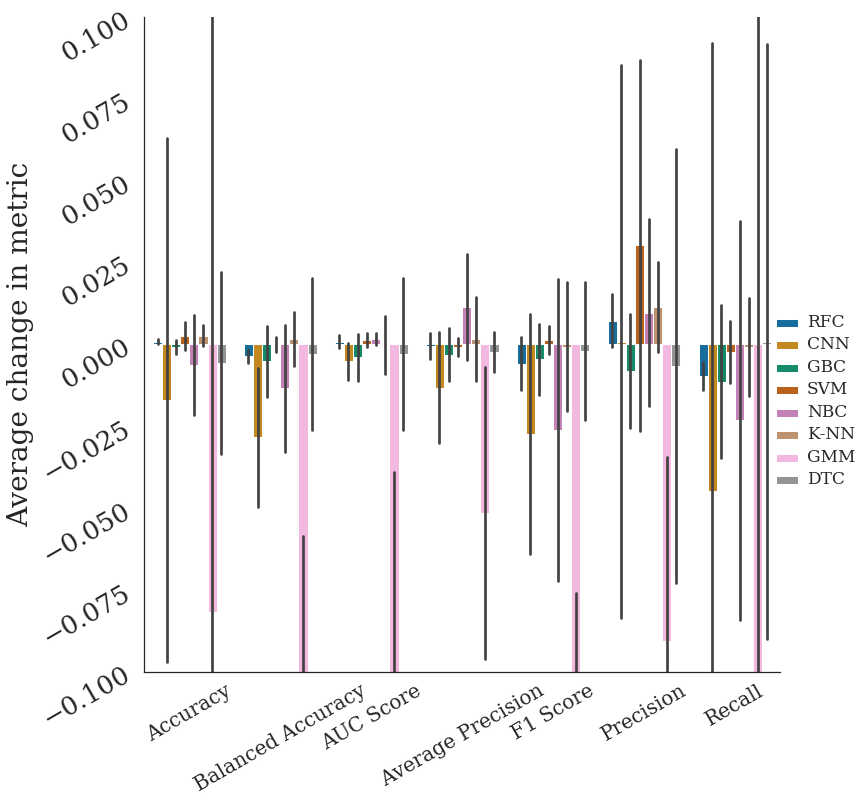

In [15]:
sns.set_style("white")
plt.rc('font', family='serif') # change font types for plots
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
g = sns.catplot(x="Metric",y="Score",hue="Model Name",data=df_raw,kind='bar',palette="colorblind",
                size=10,legend_out=True,ci='sd')
g.axes[0,0].set_title("Average Change in Model Performance",fontsize="28")
g.axes[0,0].tick_params(axis='both', which='major', labelsize=16,rotation=30)
g.axes[0,0].set_xlabel("")
g.axes[0,0].set_ylabel("Average change in metric",fontsize='28')
plt.ylim(-.1,.1)
g._legend.set_title("")

plt.setp(g._legend.get_texts(), fontsize='17')

plt.title("")
plt.yticks(fontsize='26')
plt.xticks(fontsize='20')

plt.savefig("./SavedFigures/Figure4_v2",dpi=600,bbox_inches="tight")

plt.show()




In [55]:
def get_tptn_results(model_df, split_values=True):
    if split_values:
        #get names of rosetta runs
        rosetta_runs = model_df[model_df['Data and Split Description']=='R']
        rosetta_runs_names = list(rosetta_runs['Run ID'].values)

        #get names of R+S runs
        entropy_rosetta_runs = model_df[model_df['Data and Split Description']=='RS']
        entropy_rosetta_runs_names = list(entropy_rosetta_runs['Run ID'].values)

        ### Rosetta Model Test Statistics data extraction

        # "R" Model

        #initialize dataframe that will contain data
        ros_df = pd.DataFrame()
        ros_df['TP Count'] = []
        ros_df['FP Count'] = []
        ros_df['TN Count'] = []
        ros_df['FN Count'] = []

        #initialize empty lists for data
        ros_tp_data = []
        ros_tn_data = []
        ros_fp_data = []
        ros_fn_data = []

        #loop through files
        for run_name in rosetta_runs_names:
            df = pd.read_csv(
                '/home/jupyter/tacc-work/model_building/all_models_results/TestHarness/test_harness_results/runs/run_%s/testing_data.csv'%run_name)
            tp,tn,fp,fn = get_tptn_data(df)

            #update the lists
            ros_tp_data.append(tp)
            ros_tn_data.append(tn)
            ros_fp_data.append(fp)
            ros_fn_data.append(fn)

        #construct final dataframe
        ros_df['TP Count'] = ros_tp_data
        ros_df['FP Count'] = ros_fp_data
        ros_df['FN Count'] = ros_fn_data
        ros_df['TN Count'] = ros_tn_data

        ros_df.describe()

        ### Rosetta+Entropy Model Test Statistics data extraction

        # "R+S" Model

        #initialize dataframe that will contain data
        spc_df = pd.DataFrame()
        spc_df['TP Count'] = []
        spc_df['FP Count'] = []
        spc_df['TN Count'] = []
        spc_df['FN Count'] = []

        #initialize empty lists for data
        spc_tp_data = []
        spc_tn_data = []
        spc_fp_data = []
        spc_fn_data = []

        #loop through files
        for run_name in entropy_rosetta_runs_names:
            df = pd.read_csv(
                '/home/jupyter/tacc-work/model_building/all_models_results/TestHarness/test_harness_results/runs/run_%s/testing_data.csv'%run_name)
            tp,tn,fp,fn = get_tptn_data(df)

            #update the lists
            spc_tp_data.append(tp)
            spc_tn_data.append(tn)
            spc_fp_data.append(fp)
            spc_fn_data.append(fn)

        #construct final dataframe
        spc_df['TP Count'] = spc_tp_data
        spc_df['FP Count'] = spc_fp_data
        spc_df['FN Count'] = spc_fn_data
        spc_df['TN Count'] = spc_tn_data

        spc_df.describe()

        results = spc_df.describe() - ros_df.describe()
        return results
    
    if not split_values:
        runs_names = list(model_df['Run ID'].values)
        
        #initialize dataframe that will contain data
        results_df = pd.DataFrame()
        results_df['TP Count'] = []
        results_df['FP Count'] = []
        results_df['TN Count'] = []
        results_df['FN Count'] = []

        #initialize empty lists for data
        results_tp_data = []
        results_tn_data = []
        results_fp_data = []
        results_fn_data = []

        #loop through files
        for run_name in runs_names:
            df = pd.read_csv(
                '/home/jupyter/tacc-work/model_building/all_models_results/TestHarness/test_harness_results/runs/run_%s/testing_data.csv'%run_name)
            tp,tn,fp,fn = get_tptn_data(df)

            #update the lists
            results_tp_data.append(tp)
            results_tn_data.append(tn)
            results_fp_data.append(fp)
            results_fn_data.append(fn)

        #construct final dataframe
        results_df['TP Count'] = results_tp_data
        results_df['FP Count'] = results_fp_data
        results_df['FN Count'] = results_fn_data
        results_df['TN Count'] = results_tn_data
        
        return results_df

In [56]:
#get the average results for each model for each metric
model_averages = []
vectors = []
for model in models_list:
    model_df = leaderboard[leaderboard["Model Name"]==model]
    for metric in metric_list:
        #print(model, metric, model_df[metric].mean())
        vectors.append([model,metric,model_df[metric].mean()])
averages_df = pd.DataFrame(vectors,columns=["model","metric","score"])

In [57]:
averages_df.T

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
model,keras cnn,keras cnn,keras cnn,keras cnn,keras cnn,keras cnn,keras cnn,gbc_classification,gbc_classification,gbc_classification,...,gmm_classification,gmm_classification,gmm_classification,decision_tree_classification,decision_tree_classification,decision_tree_classification,decision_tree_classification,decision_tree_classification,decision_tree_classification,decision_tree_classification
metric,Accuracy,Balanced Accuracy,AUC Score,Average Precision,F1 Score,Precision,Recall,Accuracy,Balanced Accuracy,AUC Score,...,F1 Score,Precision,Recall,Accuracy,Balanced Accuracy,AUC Score,Average Precision,F1 Score,Precision,Recall
score,0.764667,0.677,0.773,0.4425,0.411333,0.409667,0.554333,0.862667,0.558,0.7575,...,0.260167,0.264667,0.382167,0.712,0.520333,0.520333,0.150833,0.1915,0.19,0.250833


# Classification Results

In [18]:
#define metrics to be looked at
clf_scores_names = [
                'Accuracy','Balanced Accuracy','AUC Score',
                'Average Precision','F1 Score','Precision',
                'Recall']

#iterate through each model
tptn_data = []
metric_data = []

for i in range(len(models_list)):
    std_data = []
    metric_data = []
    #specify which model we're looking at
    model = models_list[i]
    print(f"\t {model.upper()}")
    
    model_df = leaderboard[leaderboard['Model Name']==model]
    
    #get tptn data
    results = get_tptn_results(model_df)
    for i in results.iloc[1,:].values:
        tptn_data.append(i) 

    
    #get metrics data
    for metric in clf_scores_names:
        spc_df = model_df[model_df['Data and Split Description']=="RS"][metric]
        ros_df = model_df[model_df['Data and Split Description']=="R"][metric]
        
        delta_metric = spc_df.describe() - ros_df.describe()
        print(f"**∆{metric}-->{delta_metric.iloc[1]}**")
        metric_data.append(delta_metric.iloc[1])
        std_data.append(delta_metric.iloc[2])
    print("")

	 SVM_CLASSIFICATION
**∆Accuracy-->0.0**
**∆Balanced Accuracy-->0.0010000000000000009**
**∆AUC Score-->0.0030000000000001137**
**∆Average Precision-->0.0019999999999990026**
**∆F1 Score-->0.001000000000000889**
**∆Precision-->-0.004000000000000559**
**∆Recall-->0.0020000000000009455**

	 RANDOM_FOREST_CLASSIFICATION
**∆Accuracy-->0.0014576271186445**
**∆Balanced Accuracy-->-0.002864406779661155**
**∆AUC Score-->-1.6949152542466983e-05**
**∆Average Precision-->-0.00047457627118674406**
**∆F1 Score-->-0.00033898305084734126**
**∆Precision-->0.0054067796610167695**
**∆Recall-->-0.009000000000000341**

	 KERAS CNN
**∆Accuracy-->0.0036610169491527733**
**∆Balanced Accuracy-->0.0012203389830509614**
**∆AUC Score-->0.0011355932203390706**
**∆Average Precision-->0.0020508474576270697**
**∆F1 Score-->0.003779661016949154**
**∆Precision-->0.00454237288135606**
**∆Recall-->-0.0021525423728810944**

	 GBC_CLASSIFICATION
**∆Accuracy-->0.0010000000000023324**
**∆Balanced Accuracy-->0.001999999999999

In [19]:
names = models_list
full_names = ["SVM","Random Forest CLF","Keras CNN","GradBoost CLF","k-NN CLF","Naive Bayes CLF","DecisionTree","GaussMix CLF"]

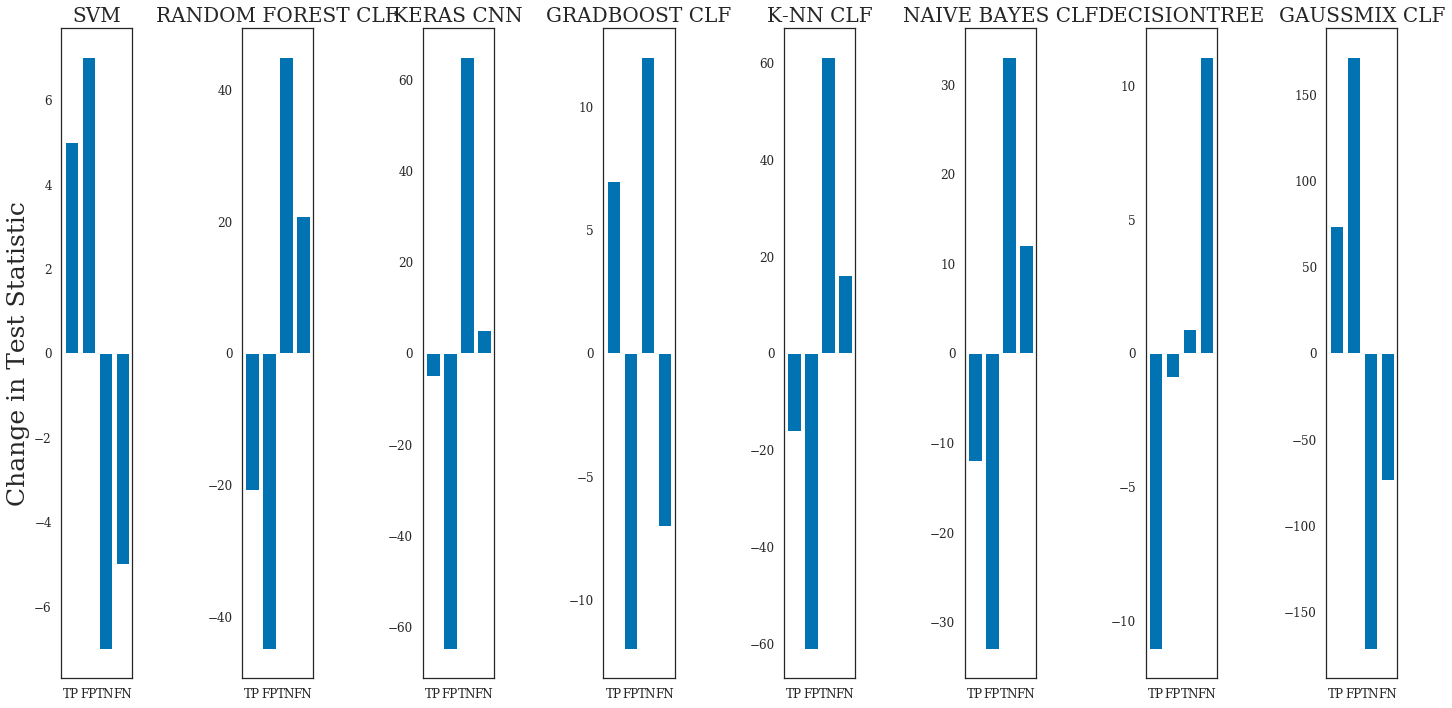

In [20]:
f, ax = plt.subplots(nrows=1,ncols=len(names),figsize=(20,10))

for i in range(len(names)):
    ax[i].bar(x=['TP','FP','TN','FN'],height=tptn_data[i*4:4*(i+1)])
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="20")
    
ax[0].set_ylabel("Change in Test Statistic",fontsize="25")
plt.tight_layout()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

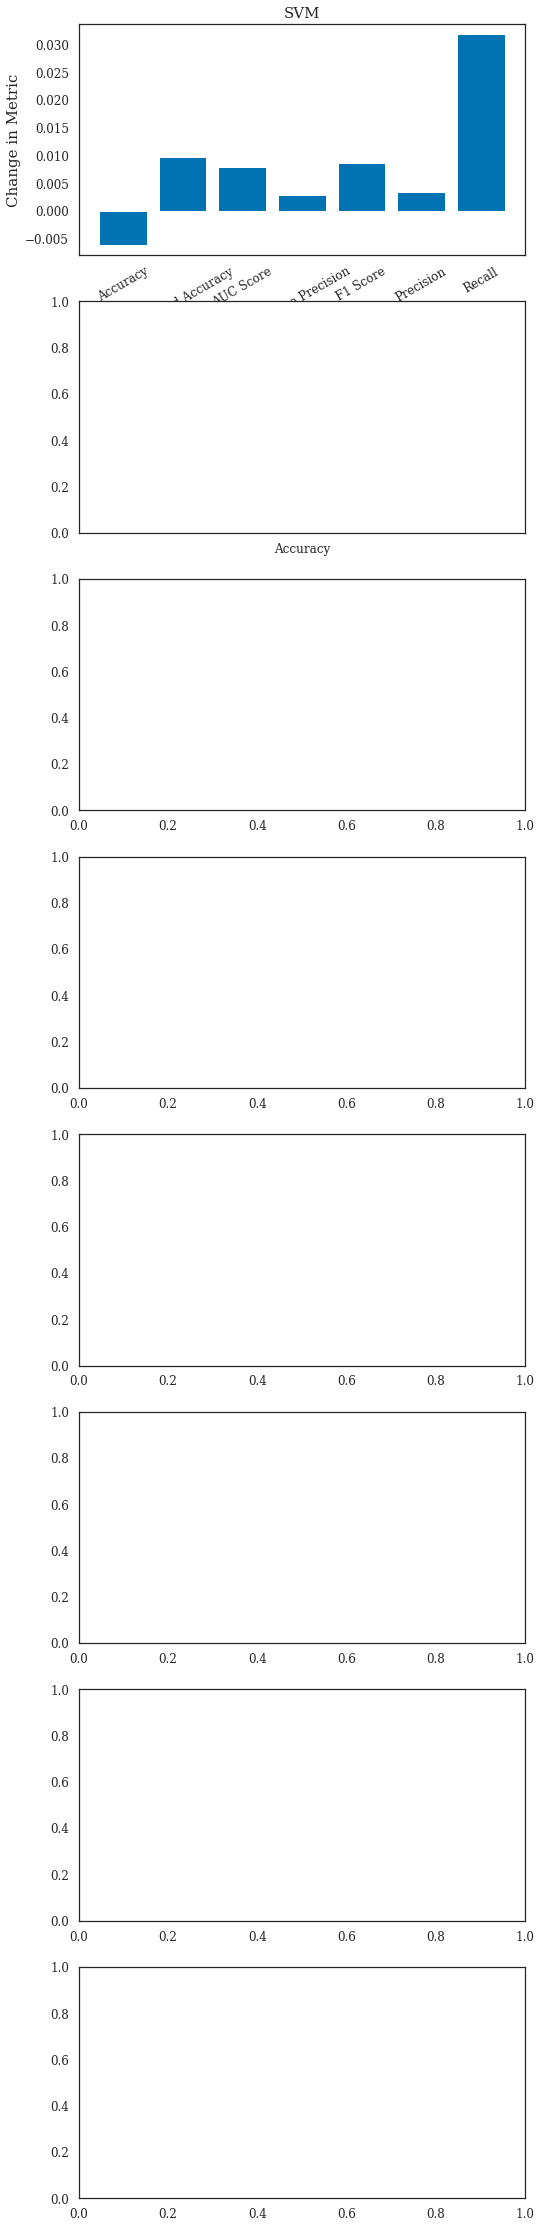

In [21]:
f, ax = plt.subplots(ncols=1,nrows=len(names),figsize=(8,40))

for i in range(len(names)):
    ax[i].bar(x=clf_scores_names,height=metric_data[i*7:7*(i+1)])
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="15")
    ax[i].set_xticklabels(labels=clf_scores_names,rotation=30)
    ax[i].set_ylabel("Change in Metric",fontsize="15")
plt.tight_layout()

In [ ]:
leaderboard['Data and Split Description'].value_counts()

In [ ]:
leaderboard['Model Name'].value_counts()

In [ ]:
leaderboard[leaderboard['Model Name']=='svm_classification']['Data and Split Description'].value_counts()

In [ ]:
#define metrics to be looked at

v = False

#iterate through each model
tptn_data_R = []
tptn_data_RS = []


metric_data_RS = [] #will have the average of each value
metric_data_R = []

std_data_RS = [] #will have the std of each value
std_data_R = []

for i in range(len(models_list)):
    #specify which model we're looking at
    model = models_list[i]
    if v: print(f"\t {model.upper()}")
    
    model_df = leaderboard[leaderboard['Model Name']==model]
    
    model_df_RS = model_df[model_df['Data and Split Description']=="RS"]
    model_df_R = model_df[model_df['Data and Split Description']=="R"]
    
    #get tptn data
    results_RS = get_tptn_results(model_df_RS,split_values=False)
    results_R = get_tptn_results(model_df_R,split_values=False)
    
    for i in results_RS.iloc[1,:].values:
        tptn_data_RS.append(i) 
    for i in results_R.iloc[1,:].values:
        tptn_data_R.append(i)

    
    #get metrics data
    for metric in clf_scores_names:
        df_RS = model_df[model_df['Data and Split Description']=="RS"][metric] 
        df_R = model_df[model_df['Data and Split Description']=="R"][metric]
        
        
        
        if v: print(f"** 'R' model {metric}--> {df_R.mean()} **")
        if v: print(f"\t std: {df_R.std()}")
        if v: print(f"** 'RS' model {metric}--> {df_RS.mean()} **")
        if v: print(f"\t std: {df_RS.std()}")
        metric_data_RS.append(df_RS.mean())
        metric_data_R.append(df_R.mean())
        
        std_data_RS.append(df_RS.std())
        std_data_R.append(df_R.std())
    if v: print("")

In [ ]:
f, ax = plt.subplots(nrows=1,ncols=len(names),figsize=(20,10))

for i in range(len(names)):
    
    barplot_df = pd.DataFrame(np.c_[tptn_data_RS[i*4:4*(i+1)],tptn_data_R[i*4:4*(i+1)]],index=['TP','FP','TN','FN'])
    
    barplot_df.plot.bar(ax=ax[i])
    ax[i].legend(["R+S","R"])
    
    #ax[i].bar(x=['TP','FP','TN','FN'],height=tptn_data_RS[i*4:4*(i+1)])
    
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="20")
    
ax[0].set_ylabel("Test Statistic",fontsize="25")
plt.tight_layout()

In [ ]:
f, ax = plt.subplots(ncols=1,nrows=len(names),figsize=(8,40))

for i in range(len(names)):
    barplot_df = pd.DataFrame(np.c_[metric_data_RS[i*7:7*(i+1)],metric_data_R[i*7:7*(i+1)]],index=[clf_scores_names])
    
    barplot_df.plot.bar(ax=ax[i])
    ax[i].legend(['RS','R'])
#     ax[i].bar(x=clf_scores_names,height=metric_data[i*7:7*(i+1)])
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="15")
    ax[i].set_xticklabels(labels=clf_scores_names,rotation=30)
    ax[i].set_ylabel("Test Statistic",fontsize="15")
plt.tight_layout()

# Regression Results

In [ ]:
leaderboard_regression = pd.read_html('/home/jupyter/tacc-work/model_building/all_models_results/TestHarness/test_harness_results/custom_regression_leaderboard.html')[0]

In [ ]:
new_model_names = list(zip(leaderboard_regression['Model Description'].unique(),["Random Forest","Keras CNN","GradBoost Reg","Ridge Reg","PartialLeastSq Reg"]))


df_subsets = []
for current_name, new_name in new_model_names:
#     print(f'current name --> {current_name}')
#     print(f'new name --> {new_name}')
    subset = leaderboard_regression[leaderboard_regression['Model Description']==current_name].copy()
#     print(subset)
    subset = subset.replace('__init__',new_name)
    df_subsets.append(subset)


In [ ]:
leaderboard_regression = pd.concat(df_subsets, ignore_index=True)
models_list_rgr = leaderboard_regression['Model Name'].unique()

In [ ]:
#define metrics to be looked at
rgr_scores_names = ['R-Squared',"RMSE"]

#iterate through each model
tptn_data_rgr = []
metric_data_rgr = []

for i in range(len(models_list_rgr)):
    #specify which model we're looking at
    model = models_list_rgr[i]
    print(f"\t {model.upper()}")
    
    model_df = leaderboard_regression[leaderboard_regression['Model Name']==model]

    
    #get metrics data
    for metric in rgr_scores_names:
        spc_df = model_df[model_df['Data and Split Description']=="RS"][metric]
        ros_df = model_df[model_df['Data and Split Description']=="R"][metric]
        
        delta_metric = spc_df.describe() - ros_df.describe()
        print(f"**∆{metric}-->{delta_metric.iloc[1]}**")
        metric_data_rgr.append(delta_metric.iloc[1])
    print("")

In [ ]:
names_rgr = [i[1] for i in new_model_names]

In [ ]:
f, ax = plt.subplots(ncols=1,nrows=len(names_rgr),figsize=(3,20))

for i in range(len(names_rgr)):
    ax[i].bar(x=rgr_scores_names,height=metric_data_rgr[i*2:2*(i+1)])
    ax[i].set_title(f"{names_rgr[i].upper()}",fontsize="15")
    ax[i].set_xticklabels(labels=rgr_scores_names,rotation=30)
    ax[i].set_ylabel("Change in Test Statistic",fontsize="15")
plt.tight_layout()